In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\cluto-t8-8k.arff')
df = pd.DataFrame(data)
df

,x,y,CLASS
0,84.768997,33.368999,b'1'
1,569.791016,55.458000,b'2'
2,657.622986,47.035000,b'4'
3,217.057007,362.065002,b'5'
4,131.723999,353.368988,b'5'
...,...,...,...
7995,384.888000,273.808014,b'7'
7996,371.938995,70.299004,b'1'
7997,37.887001,79.575996,b'1'
7998,175.552994,76.314003,b'1'


In [2]:
pd.DataFrame(data)["CLASS"].value_counts()

CLASS
b'7'        1557
b'1'        1455
b'5'        1452
b'4'        1393
b'0'        1112
b'3'         351
b'noise'     323
b'2'         182
b'6'         175
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
data_pd = pd.DataFrame(data)
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : c.decode("utf-8"))
data_pd["CLASS"] = data_pd["CLASS"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,CLASS
0,84.768997,33.368999,1
1,569.791016,55.458000,2
2,657.622986,47.035000,4
3,217.057007,362.065002,5
4,131.723999,353.368988,5
...,...,...,...
7995,384.888000,273.808014,7
7996,371.938995,70.299004,1
7997,37.887001,79.575996,1
7998,175.552994,76.314003,1


### k means 

In [5]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [6]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["CLASS"],y_kmeans) 

0.6428786382188332

In [7]:
import time

start = time.time()

kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0892 saniye


### agglomerative

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=8)
labels_agg = agg.fit_predict(X_scaled)

In [10]:
normalized_mutual_info_score(data_pd["CLASS"],labels_agg) 

0.6531249683015672

In [11]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=8)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 2.3692 saniye


### dbscan

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

In [27]:
normalized_mutual_info_score(data_pd["CLASS"],labels) 

0.8511330512463281

In [16]:
import time

start = time.time()

dbscan = DBSCAN(eps=0.2, min_samples=100)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"dbscan çalışma süresi: {end - start:.4f} saniye")

dbscan çalışma süresi: 0.1646 saniye


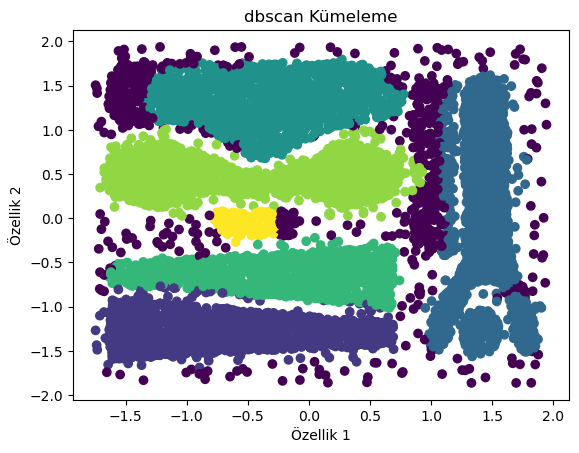

In [22]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('dbscan Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

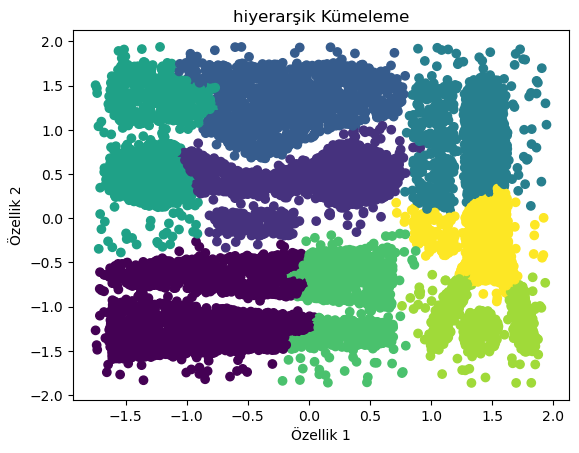

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('hiyerarşik Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

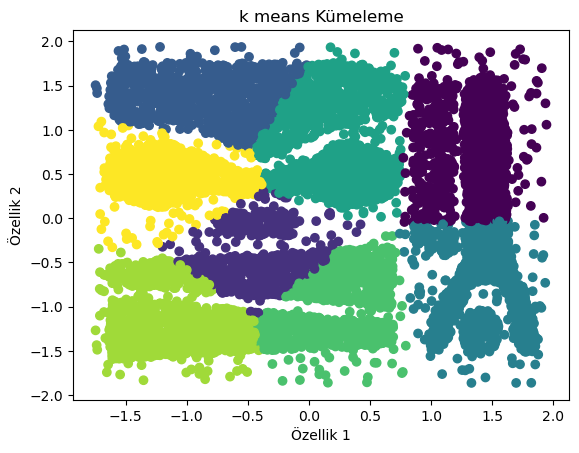

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('k means Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()